In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

%matplotlib inline

In [39]:
from sklearn.datasets import load_iris
iris_data = load_iris()
type(iris_data)

sklearn.utils.Bunch

In [25]:
print('iris_data keys:{}'.format(iris_data.keys()))
print(iris_data['DESCR'][:500] + '\n')
print('species: {}'.format(iris_data['target_names']))
print('features: {}'.format(iris_data['feature_names']))
print('data type: {}'.format(type(iris_data['data'])))
print('data shape: {}'.format(iris_data['data'].shape))

iris_data keys:dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                


species: ['setosa' 'versicolor' 'virginica']
features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
data type: <class 'numpy.ndarray'>
data shape: (150, 4)


In [27]:
print('first five rows:\n{}'.format(iris_data['data'][:5]))

first five rows:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [38]:
print('target object type: {}'.format(type(iris_data['target'])))
print('target data shape: {}'.format(iris_data['target'].shape))
print('target names: {}'.format(iris_data['target_names']))
print('target:\n{}'.format(iris_data['target']))

target object type: <class 'numpy.ndarray'>
target data shape: (150,)
target names: ['setosa' 'versicolor' 'virginica']
target:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris_data['data'], iris_data['target'], random_state=42
)

In [42]:
print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))

print('\n\nX_test shape : {}'. format(X_test.shape))
print('y_test shape: {}'.format(y_test.shape))

X_train shape: (112, 4)
y_train shape: (112,)


X_test shape : (38, 4)
y_test shape: (38,)


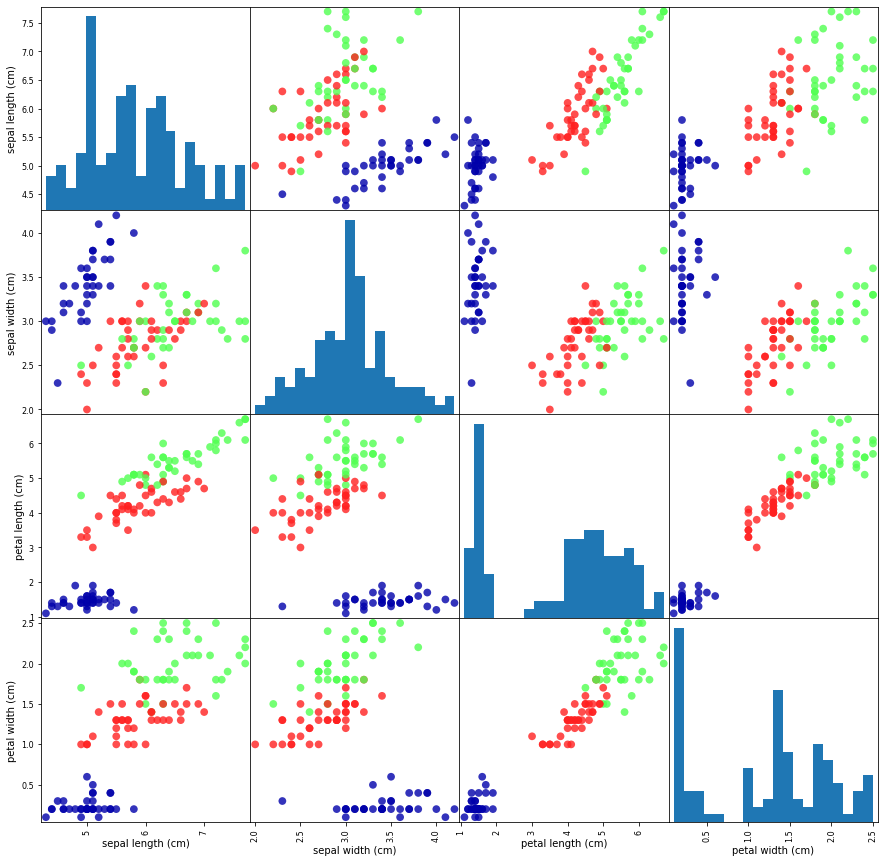

In [46]:
iris_df = pd.DataFrame(X_train, columns=iris_data.feature_names)
grr = pd.plotting.scatter_matrix(iris_df, c=y_train, figsize=(15, 15), marker='o', hist_kwds={'bins': 20}, s=60, alpha=0.8, cmap=mglearn.cm3)

In [50]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [66]:
X_new = np.array([[5, 2.9, 1.2, 0.2]])
print('X_new.shape: {}'.format(X_new.shape))

X_new.shape: (1, 4)


In [67]:
prediction = knn.predict(X_new)
print('Prediction: {}'.format(prediction))
print('Flower species: {}'.format(iris_data['target_names'][prediction]))

Prediction: [0]
Flower species: ['setosa']


In [68]:
y_pred = knn.predict(X_test)
print('Test set prediciton:\n{}'.format(y_pred))

Test set prediciton:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [72]:
print('Test set prediction accuracy: {}%'.format(np.mean(y_pred == y_test) * 100))

Test set prediction accuracy: 100.0%


In [73]:
print('Test set prediction accuracy(score method): {}%'.format(knn.score(X_test, y_test) * 100))

Test set prediction accuracy(score method): 100.0%


COMPACT VERSION:

In [74]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_data['data'], iris_data['target'], random_state=42
)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print('Test set prediction accuracy: {:.2f}%'.format(knn.score(X_test, y_test) * 100))

Test set prediction accuracy: 100.00%
